# Customer Clustering

## Introduction

This notebook aims at utilizing a clustering method in order to find patterns in a data set containing information about customers. The clusters shall be investigated further in the end in order to gain more knowledge about each cluster. 

## Data Set

### Link

Data can be found on Kaggle (https://www.kaggle.com/dev0914sharma/customer-clustering?select=segmentation+data.csv).

### Description							
											
| Variable | Data type | Range | Description |
| :- | :- | :- | :- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1}	| Biological sex (gender) of a customer. In this dataset there are only 2 different options. <br>0 male <br>1 female |	
| Marital status | categorical | {0,1} | Marital status of a customer. <br> 0 single <br> 1	non-single (divorced / separated / married / widowed) |
| Age |	numerical |	Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset. <br> 18	Min value (the lowest age observed in the dataset) <br> 76	Max value (the highest age observed in the dataset) |					
| Education	| categorical | {0,1,2,3} | Level of education of the customer <br>	0 other / unknown <br> 1 high school <br> 2 university	<br> 3 graduate school	|						
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. <br> 35832	Min value (the lowest income observed in the dataset) <br> 309364 Max value (the highest income observed in the dataset) |
| Occupation |	categorical | {0,1,2} |	Category of occupation of the customer. <br> 0 unemployed / unskilled <br> 1 skilled employee / official <br> 2	management / self-employed / highly qualified employee / officer |
| Settlement size |	categorical | {0,1,2} |	The size of the city that the customer lives in. <br> 0	small city <br> 1 mid-sized city <br> 2	big city |


In [93]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")

In [94]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Import and Initial EDA

In [95]:
data = pd.read_csv(r"data\segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [96]:
# get info of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [97]:
# call describe method for some statistics
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [98]:
# check unique value counts in order to remove columns with only unique values (potentially: ID column)
for col in data.columns:
    num_unique = len(data[col].unique())
    print(f"Column {col} has {num_unique} unique values ({100 * num_unique / data.shape[0]} % of total data)")

Column ID has 2000 unique values (100.0 % of total data)
Column Sex has 2 unique values (0.1 % of total data)
Column Marital status has 2 unique values (0.1 % of total data)
Column Age has 58 unique values (2.9 % of total data)
Column Education has 4 unique values (0.2 % of total data)
Column Income has 1982 unique values (99.1 % of total data)
Column Occupation has 3 unique values (0.15 % of total data)
Column Settlement size has 3 unique values (0.15 % of total data)


The column ID can be dropped because it delivers no useful information about the customer. The column income has a lot of unique values, which is okay because this column is a numeric column. 

In [99]:
# drop column ID
data = data.drop(columns=["ID"])
data_orig = data.copy()
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


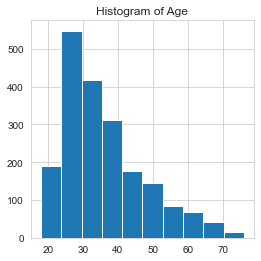

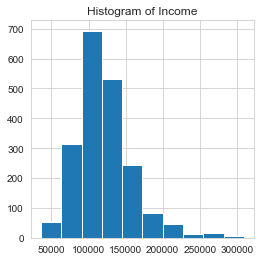

In [100]:
# plot histograms of numeric features
list_num_features = ["Age", "Income"]
list_categorical_features = ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]

for col in list_num_features:
    plt.figure(figsize=(4,4))
    plt.hist(data[col])
    plt.title(f"Histogram of {col}")
    plt.show()

Both features are looking little bit skewed. Let's check the skewness and transform if required.

In [101]:
data[list_num_features].skew()

Age       1.009940
Income    1.196085
dtype: float64

In [102]:
skew_limit = 0.75
skew_vals = data[list_num_features].skew().sort_values(ascending=False)

skew_vals = skew_vals.loc[skew_vals > skew_limit]
skew_vals

Income    1.196085
Age       1.009940
dtype: float64

In [103]:
# apply log transform
for col in skew_vals.index.tolist():
    data[col] = np.log1p(data[col])

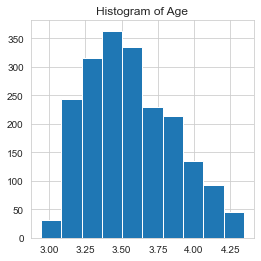

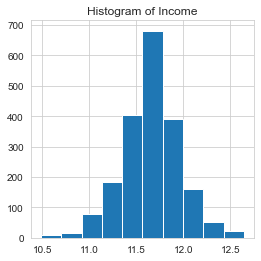

In [104]:
for col in list_num_features:
    plt.figure(figsize=(4,4))
    plt.hist(data[col])
    plt.title(f"Histogram of {col}")
    plt.show()

Perfect! Both columns are now less skewed.

<AxesSubplot:>

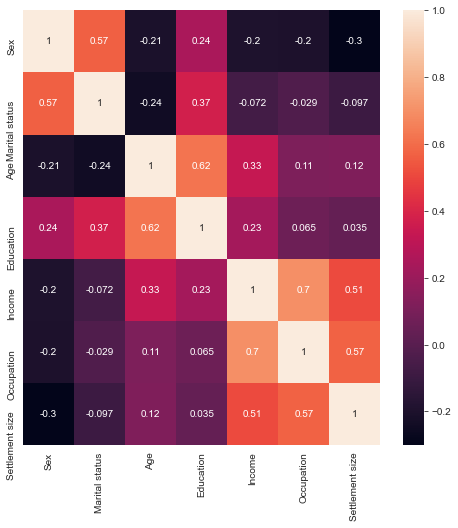

In [105]:
# Let's check the correlation heat map
corr_vals = data.corr()
sns.heatmap(corr_vals, annot=True)

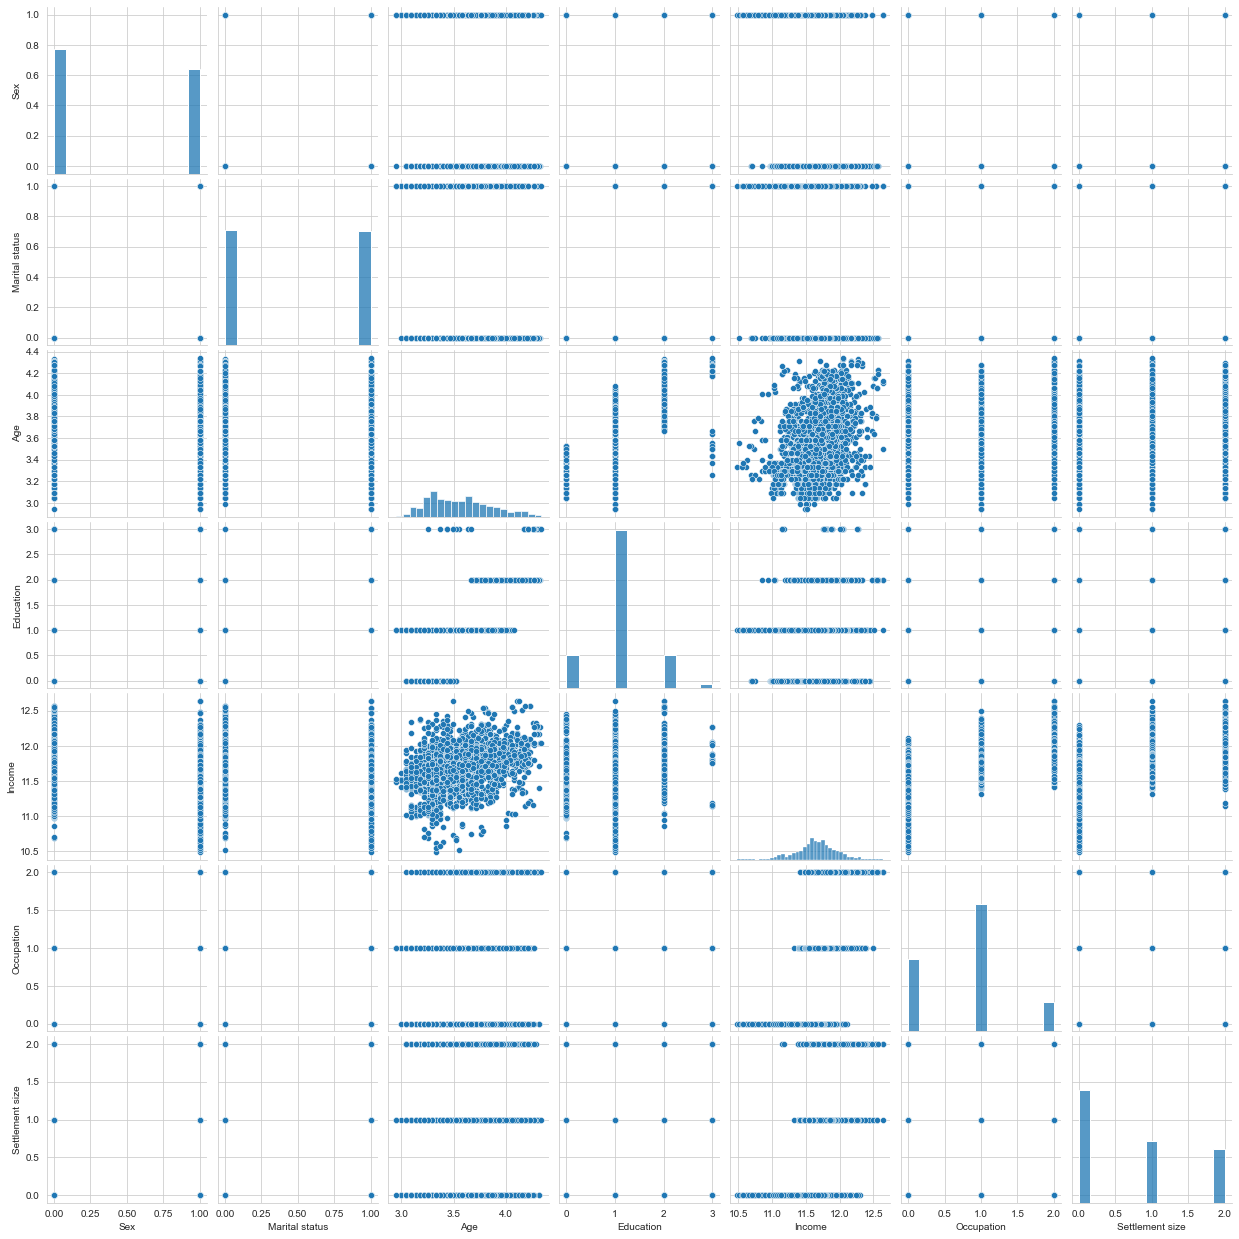

In [106]:
# finally: plot pairplot

sns.pairplot(data)

## Scale the Data

In [107]:
# use sklearns standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

X = data.to_numpy()

sc = StandardScaler()
X = sc.fit_transform(X)


## Use K-Means for Clustering

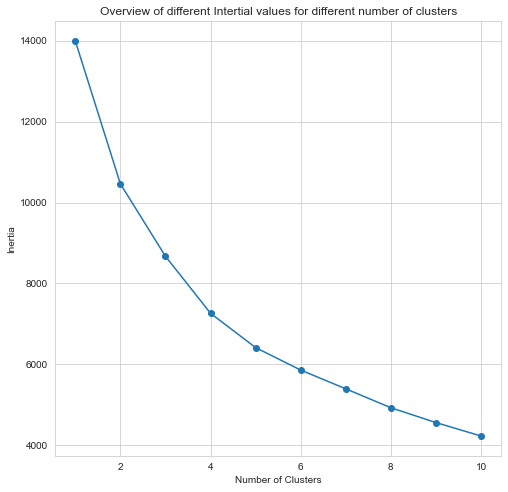

In [108]:
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Overview of different Intertial values for different number of clusters")
plt.show()

The elbow method is hard to apply here. But let's continue with four clusters, becasue there could be the elbow point.

In [109]:
km = KMeans(n_clusters=4)
km.fit(X)
preds = km.predict(X)

## Investigate Clusters

In [110]:
data_orig["Cluster Nr"] = preds
data_orig.groupby(by="Cluster Nr").mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster Nr,,,,,,,
0,0.730841,0.988785,27.906542,1.000000,121324.493458,1.071028,0.833645
1,0.617391,0.431304,32.631304,0.885217,87274.460870,0.085217,0.006957
2,0.011785,0.015152,36.792929,0.680135,137826.106061,1.185185,1.244108
3,0.543919,0.699324,54.966216,2.121622,151853.756757,0.996622,0.976351
